<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Первый-взгляд" data-toc-modified-id="Первый-взгляд-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Первый взгляд</a></span></li><li><span><a href="#Подробное-изучение" data-toc-modified-id="Подробное-изучение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подробное изучение</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выделение-товарных-категорий" data-toc-modified-id="Выделение-товарных-категорий-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выделение товарных категорий</a></span></li><li><span><a href="#Расчёт-характеристик-заказов" data-toc-modified-id="Расчёт-характеристик-заказов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчёт характеристик заказов</a></span></li><li><span><a href="#Расчёт-характеристик-покупателей" data-toc-modified-id="Расчёт-характеристик-покупателей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Расчёт характеристик покупателей</a></span></li><li><span><a href="#Исследование-характеристк-покупателей" data-toc-modified-id="Исследование-характеристк-покупателей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование характеристк покупателей</a></span></li></ul></li><li><span><a href="#Кластеризация-покупателей" data-toc-modified-id="Кластеризация-покупателей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация покупателей</a></span><ul class="toc-item"><li><span><a href="#Выбор-оптимального-числа-кластеров" data-toc-modified-id="Выбор-оптимального-числа-кластеров-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выбор оптимального числа кластеров</a></span></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Кластеризация</a></span></li><li><span><a href="#Проверка-стат.значимости-кластеризации" data-toc-modified-id="Проверка-стат.значимости-кластеризации-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка стат.значимости кластеризации</a></span></li></ul></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></div>

# Сегментация покупателей по профилю потребления

**Материалы**:
* [Презентация](https://drive.google.com/file/d/1BsIhczYmvlCiKUxFA4mB3Tdsv2yl1tP8/view?usp=sharing)
* [Дашборд](https://public.tableau.com/views/__16318899266440/sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link) (вариант 2)

## Загрузка данных

In [1]:
# Основные
import pandas as pd
import numpy as np
import datetime as dt
import warnings 
# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go 
# Машинное обучение
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None) 

In [4]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv')

## Изучение данных

### Первый взгляд

In [5]:
data.info() 
print('\nКоличество повторяющихся строк —', data.duplicated().sum())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB

Количество повторяющихся строк — 0


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>дубликатов не обнаружено</li>
<li>пропусков не обнаружено</li>
<li>привести поле <b>date</b> к типу <b>datetime</b></li>
</div>

### Подробное изучение

In [6]:
data.groupby('order_id').agg(dates_cnt=('date','nunique')).reset_index()\
                        .query('dates_cnt >1').sort_values(by='dates_cnt', ascending=False).reset_index(drop=True).head()

,order_id,dates_cnt
0,14833,74
1,70960,60
2,69162,23
3,71148,16
4,69531,12


In [7]:
data.groupby('order_id').agg(dates_cnt=('date','nunique')).query('dates_cnt >1').count()

dates_cnt    284
dtype: int64

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>у некоторых записей совпадают значения основных полей (<b>order_id</b>, <b>customer_id</b>, <b>product</b>), но не совпадает время заказа</li>
<li>вероятно, поле <b>date</b> на самом деле хранит дату и время изменения записи </li>
<li>поэтому для каждого заказа следует оставить только запись, относящуюся к его последнему состоянию</li>
</div>

In [8]:
data.groupby('order_id').agg(customers_cnt=('customer_id','nunique')).reset_index()\
                    .query('customers_cnt>1').sort_values(by='customers_cnt', ascending=False).reset_index(drop=True).head()

,order_id,customers_cnt
0,72845,4
1,69485,3
2,71480,3
3,14872,2
4,70946,2


In [9]:
data.groupby('order_id').agg(customers_cnt=('customer_id','nunique')).query('customers_cnt>1').count()

customers_cnt    29
dtype: int64

In [10]:
data.query('order_id == 70946')

,date,customer_id,order_id,product,quantity,price
2579,2019040109,6a4d397b-8f89-4382-89b3-9ef535eee80d,70946,Пеларгония розебудная Prins Nikolai укорененный черенок,1,134.0
3467,2019050816,753660bf-a1ea-4447-853d-622e47c1c6ac,70946,Пеларгония розебудная Prins Nikolai укорененный черенок,1,134.0


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>как разные пользователи ухитрились в разное время сделать одинаковые по составу заказы с одинаковыми индентификаторами — загадка</li>
<li>такие заказы лучше удалить, к счастью, их немного</li>
</div>

## Предобработка данных

In [11]:
data['date'] = data['date'].apply((lambda x : dt.datetime.strptime(str(x), '%Y%m%d%H').strftime('%Y-%m-%d %H')))

In [12]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [13]:
data = data.sort_values(by=['order_id', 'date'])\
                .drop_duplicates(subset=['order_id', 'customer_id', 'product'], keep='last').copy()

In [14]:
data = data[~(data.order_id.isin(data.groupby('order_id').agg(customers_cnt=('customer_id','nunique')).reset_index()\
                     .query('customers_cnt>1')['order_id']))].copy()

In [15]:
len(data)

4785

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>поле <b>date</b> приведено к типу <b>datetime</b></li>
<li>исключены неактуальные состояния записей</li> 
<li>исключены заказы, сделанные несколькими пользователями</li> 
</div>

## Исследовательский анализ данных

In [16]:
# Построение графиков
def draw_chart(data, kind, data_y=None, data_x=None, title=None, xlabel=None, ylabel = None
               , height=None, width=None
               , vmax=None, fmt=None, color = None, color_name=None):
        # Гистограмма
    if kind == 'hist':
        # Количество корзин
        def calc_bins (data, data_y):
            if data[data_y].max() < 20:
                return 100
            else: return 50
        # График
        calculated_bins = calc_bins(data, data_y)
        fig = px.histogram(data, x = data_y, nbins=calculated_bins, color=color)        
    # Тепловая карта     
    elif kind == 'heatmap':
        sns.set(style='white')
        plt.figure(figsize=(13, 9)) 
        plt.title(title, fontsize=16)
        fig = sns.heatmap(data, annot=True, linewidths=1, linecolor='gray', fmt=fmt)
        plt.xticks(rotation=45) 
        plt.yticks(rotation=45) 
        plt.gcf().autofmt_xdate()
    # Точечный
    elif kind == 'scatter':
        fig = px.scatter(data_frame =data, x = data_x, y=data_y)
    # Столбцовый
    elif kind == 'bar':
        fig = px.bar(data, x=data_x, y=data_y, color=color, labels={color:color_name}#, text=data_y              
                    )
        #fig.layout.yaxis.showticklabels=False
    # Линейный
    elif kind == 'line':
        fig = px.line(data, x=data_x, y=data_y)
    # Бокс 
    elif kind == 'box':
        plt.figure(figsize=(15, 10)) 
        fig = px.box(data, x=data_x, y=data_y)
        plt.show() 
    # Дендрограмма
    elif kind == 'dendrogram':
        plt.figure(figsize=(15, 10))
        fig=dendrogram(data, orientation='top',no_labels=True)
        plt.title(title)
        
    if kind !='hist' and kind !='heatmap' and kind !='dendrogram':
        fig.update_layout(
        height=height, width=width,
        title='<b>%s</b>'%(title), title_x=0.5, title_font_color = 'black',
        xaxis_title='%s'%(xlabel), xaxis_title_font_color = 'black',
        yaxis_title='%s'%(ylabel), yaxis_title_font_color = 'black',
        font=dict(family='Calibri, monospace', size=16, color='#7f7f7f'))
    elif kind =='hist':
        fig.update_layout(
        height=height, width=width,
        title='<b>Распределение по %s</b>'%(data_y), title_x=0.5, title_font_color = 'black',
        xaxis_title='Значение', xaxis_title_font_color = 'black',
        yaxis_title='Частота', yaxis_title_font_color = 'black',
        font=dict(family='Calibri, monospace', size=16, color='#7f7f7f'))
    if kind !='dendrogram':
        return fig  

### Выделение товарных категорий
* растения (комнатные, садовые, семена)
* товары для дома (посуда, техника, сумки, искусственные цветы)

In [17]:
pot_plants = ['комнатн', 'в горшке', 'горшок', 'горшка', 'кашпо', 'домашн', 'd-', 'растение', 'пеларгония', 'объем',
             'петуния', 'лобелия', 'примула', 'цикломен', 'фуксия', 'калибрахоа', 'бегония', 'вербена', 'вербейник',
             'бакопа','роза', 'калла', 'тюльпан', 'осина', 'гвоздика']
sprouts = ['рассада', 'черенок', 'томат', 'огурец', 'тыква', 'дыня', 'арбуз', 'клубника', 'сельдерей', 'кассет'
           , 'баклажан', 'патисcон', 'базилик', 'земляника', 'виноград']
house = ['щетка', 'щётка', 'таз', 'вантуз', 'этажерка', 'веревка', 'сумка', 'тележка', 'скатерть', 'посуд']
dummies = ['муляж','искусственный цветок', 'цветок искусственный', 'искуственных цветов', 'искусственная лиана']
seeds = [' г ', '46500', '4660']

In [18]:
def class_product(data, column, new_column, category, good_words, bad_words=None):
    gw = '|'.join(good_words)
    if bad_words is not None:
        bw = '|'.join(bad_words)
        data.loc[(data[column].str.lower().str.contains(gw))&(~(data[column].str.lower().str.contains(bw))), new_column] =\
        category
    else:
        data.loc[(data[column].str.lower().str.contains(gw)), new_column] =\
        category

In [19]:
class_product(data, 'product', 'product_type', 'растения', pot_plants+sprouts+seeds, house+dummies)

In [20]:
data.product_type = data.product_type.fillna('хозтовары')

### Расчёт характеристик заказов
* количество позиций (**sku_cnt**)
* количество предметов (**items_cnt**)
* общая сумма (**order_sum**)
* количество категорий товара (**types_cnt**)
* основная категория — по числу товаров, относящихся к категории — (**mayor_type**)

In [21]:
orders = data.groupby(['order_id', 'date', 'customer_id']).agg(sku_cnt =('product','nunique')
                                                               , items_cnt =('quantity','sum')
                                                               , types_cnt = ('product_type','nunique')
                                                               , mayor_type = ('product_type',list)).reset_index()

In [22]:
orders.mayor_type = orders.mayor_type.apply(lambda x: max(set(x)))

In [23]:
orders = orders.merge((data.price * data.quantity).groupby(data['order_id']).sum().reset_index(name='order_sum')
                                                                                  , on ='order_id', how='left').copy()

In [24]:
orders['date'] = orders['date'].transform(lambda x : x.astype('datetime64[D]'))
orders['month'] = orders['date'].transform(lambda x : x.astype('datetime64[M]'))

In [25]:
orders.head()

,order_id,date,customer_id,sku_cnt,items_cnt,types_cnt,mayor_type,order_sum,month
0,12624,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,2,2,1,растения,375.0,2019-06-02
1,13547,2018-11-16,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,3,3,1,растения,684.0,2018-11-16
2,14480,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,3,3,1,растения,359.0,2018-10-02
3,14481,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,4,4,1,растения,600.0,2018-10-02
4,14482,2018-10-07,43993fd2-20c9-44f7-8634-cf0aee26df4f,2,2,1,растения,376.0,2018-10-07


In [26]:
orders.mayor_type.value_counts()

хозтовары    2027
растения      744
Name: mayor_type, dtype: int64

In [27]:
orders.query('types_cnt >1').mayor_type.value_counts()

хозтовары    18
Name: mayor_type, dtype: int64

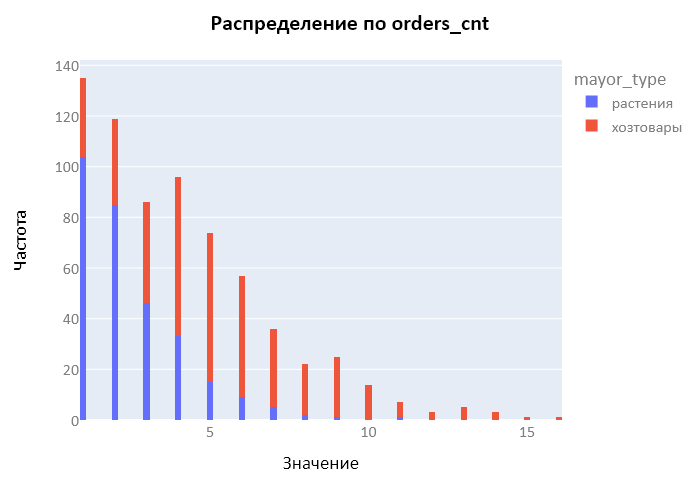

In [28]:
fig = draw_chart(orders.groupby(['month', 'mayor_type']).agg(orders_cnt=('order_id','count')).reset_index()
           , kind ='hist', data_y='orders_cnt', color='mayor_type')
fig.show('png')

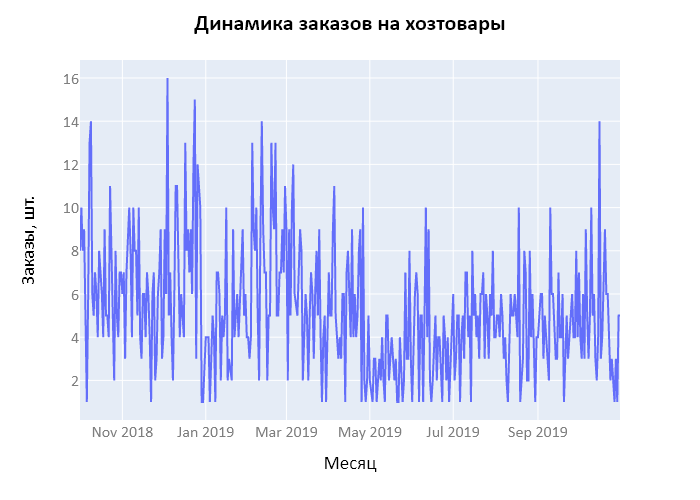

In [29]:
fig = draw_chart(orders.query('mayor_type=="хозтовары"').groupby('month').agg(orders_cnt=('order_id','count')).reset_index()
           , kind ='line', data_x='month', data_y='orders_cnt'
           , title='Динамика заказов на хозтовары', xlabel = 'Месяц', ylabel = 'Заказы, шт.')
fig.show('png')

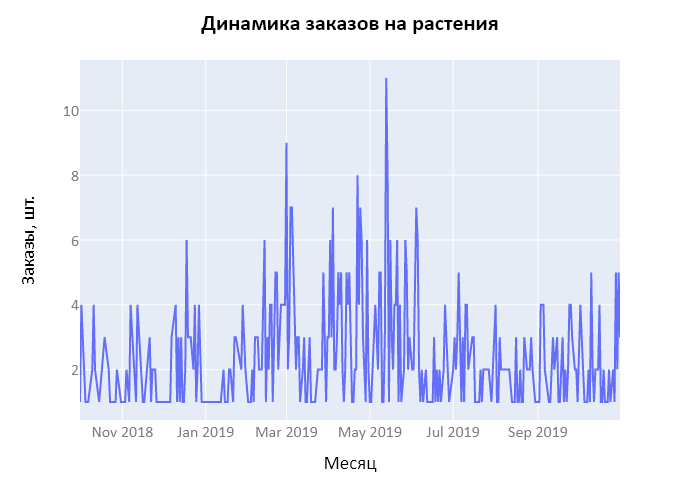

In [30]:
fig = draw_chart(orders.query('mayor_type=="растения"').groupby('month').agg(orders_cnt=('order_id','count')).reset_index()
           , kind ='line', data_x='month', data_y='orders_cnt'
           , title='Динамика заказов на растения', xlabel = 'Месяц', ylabel = 'Заказы, шт.')
fig.show('png')

In [31]:
orders.to_csv('orders.csv')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>в заказе почти всегда товары из одной категории, всего 18 заказов содержат и растения, и хозтовары (преобладают хозтовары)</li>
<li>да и в целом хозтовары — более популярная категория, опережает растения почти в 3 раза</li>    
<li>больше всего заказов в декабре и с февраля по май (вероятно, праздники и рассада)</li> 
<li>а меньше всего — в июне и январе (подарки куплены, огород засажен)</li> 
</div>

### Расчёт характеристик покупателей
По месяцам:
* общее количество количество заказов (**orders_cnt**)
* среднее количество позиций в заказе (**sku_avg**)
* среднее количество товаров в заказе (**items_avg**)
* средняя сумма заказа (**sum_avg**)
* время с превого заказа пользователя до самого позднего заказа — в месяцах (**lifetime_mo**)
* среднее время между заказами — в месяцах (**mean_order_gap_mo**)
* любимая товарная группа — по числу товаров из этой группы в заказах (**fav_type**)

In [32]:
users = orders.groupby('customer_id').agg(orders_cnt =('order_id','count')
                                          , sku_avg =('sku_cnt','mean')
                                          , items_avg =('items_cnt','mean')
                                          , sum_avg = ('order_sum', 'mean')
                                          , fav_type = ('mayor_type', list)
                                         ).reset_index()

In [33]:
users['lifetime_mo'] =\
                ((max(orders.date.astype('datetime64[D]')) 
                - orders.groupby('customer_id').agg(first_order_date = ('date', 'min')).reset_index()['first_order_date']\
                        .transform(lambda x : x.astype('datetime64[D]')))/ np.timedelta64(1, 'M')).round(2)

In [34]:
users.fav_type = users.fav_type.apply(lambda x: max(set(x)))

In [35]:
orders_dates = orders.groupby('customer_id')['date'].apply(set).apply(list).reset_index(name='orders_dates')
orders_dates['orders_dates'] = orders_dates['orders_dates'].apply(lambda x :np.sort(x))
orders_dates['orders_dates_cnt'] = orders_dates['orders_dates'].apply(lambda x: np.array(x)).apply(lambda x: x.size)

In [36]:
def time_diff(data, column_cnt, column_array, new_column_array, new_column_array_mean):    
    data[new_column_array] = np.empty((len(data), 0)).tolist()
    data[new_column_array_mean] = np.empty((len(data), 0)).tolist()
    for i in range(len(data)):
        j = data[column_cnt][i] -1
        while j >0:
            data[new_column_array][i].append(((data[column_array][i][j] \
                                              - data[column_array][i][j-1])/np.timedelta64(1, 'M')))
            j = j -1
        data[new_column_array_mean][i] =\
        (np.sum(data[new_column_array][i])/len(data[new_column_array][i]))

In [37]:
time_diff(orders_dates, 'orders_dates_cnt', 'orders_dates', 'date_diff', 'mean_order_gap_mo');

In [38]:
users = users.merge(orders_dates[['customer_id', 'mean_order_gap_mo']], on = 'customer_id', how='left').fillna(-1).copy()

In [39]:
users.head()

,customer_id,orders_cnt,sku_avg,items_avg,sum_avg,fav_type,lifetime_mo,mean_order_gap_mo
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,4.0,4.0,555.0,растения,0.49,-1.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,1.0,1.0,442.0,хозтовары,8.44,-1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1.0,2.0,914.0,хозтовары,0.56,-1.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1.0,1.0,1649.0,хозтовары,9.10,-1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1.0,2.0,2324.0,хозтовары,1.05,-1.0


In [40]:
len(users)

2394

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
Получена витрина пользователей на 7 признаков — ура! Теперь посмотрим на эти признаки.
</div>

### Исследование характеристк покупателей

In [41]:
users_corr = users.corr()

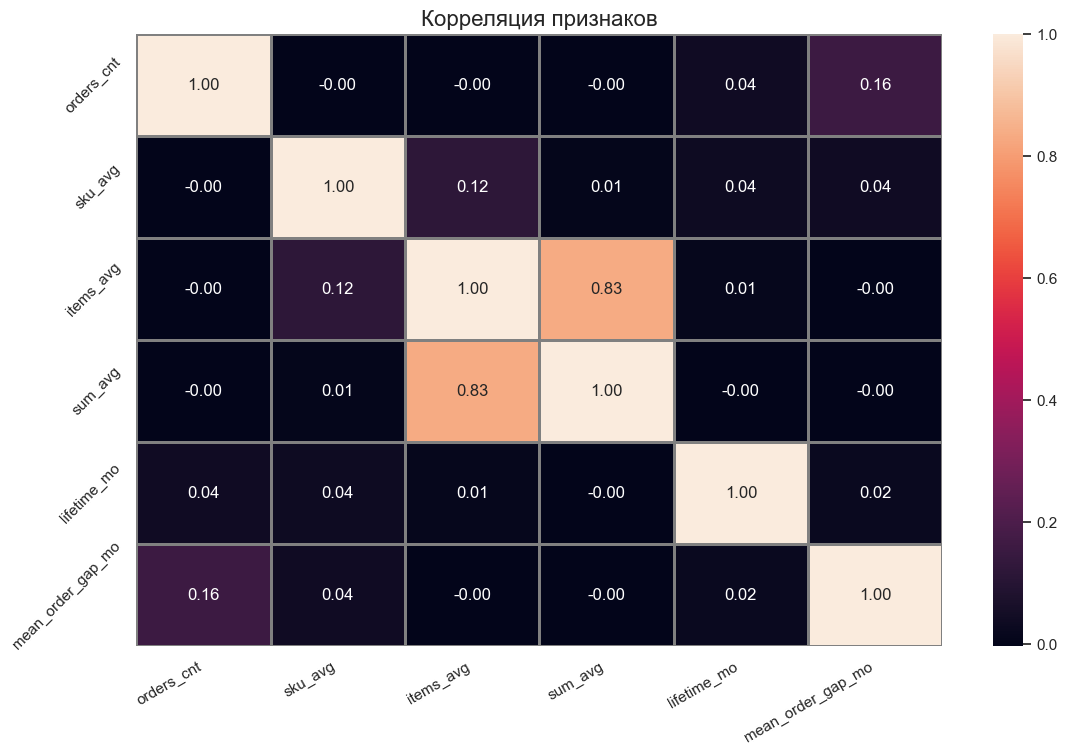

In [42]:
draw_chart(users_corr, kind='heatmap',title='Корреляция признаков', fmt='.2f');

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>Высокую положительную корреляцию демострируют <b>среднее количество товаров в заказе</b> и <b>средняя сумма заказа</b></li>
<li>Небольшая положительная корреляция наблюдается между <b>средним количеством SKU</b> и <b>средним количеством товаров</b> в заказе, а также между <b>количеством заказов</b> и <b>средним промежутком между заказами</b></li>
</div>

In [43]:
users['fav_type_code'] = users['fav_type'].map({'растения':0,'хозтовары':1})

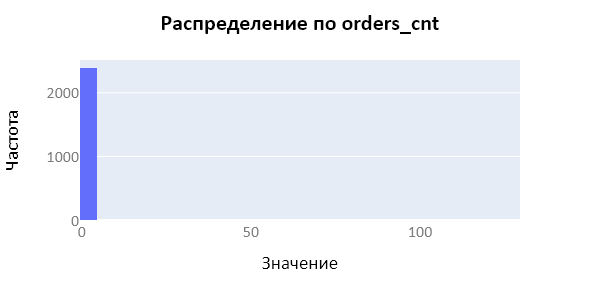

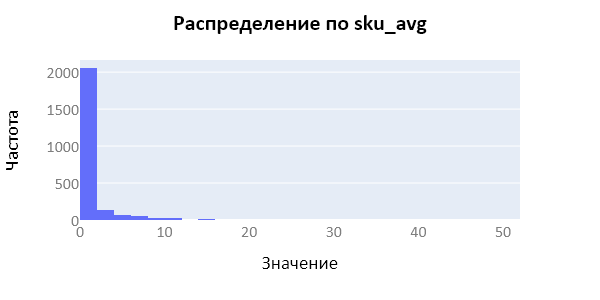

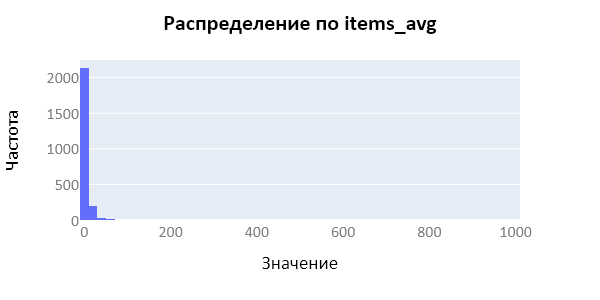

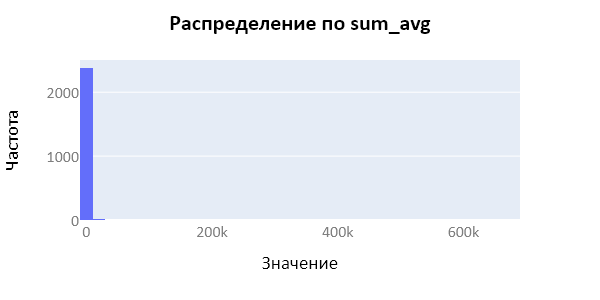

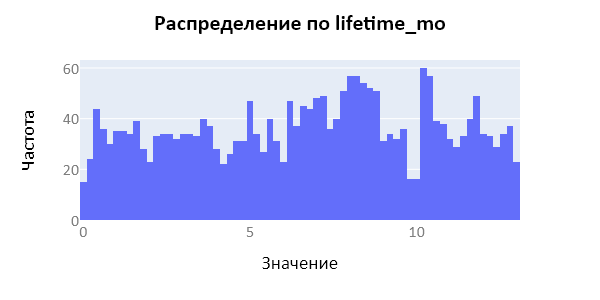

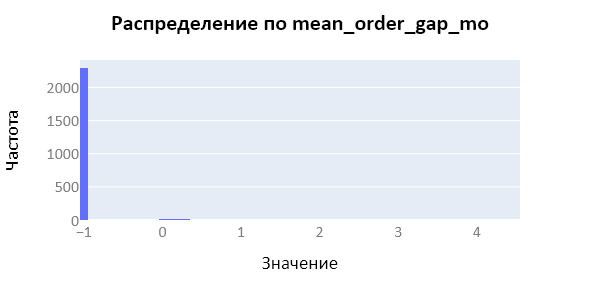

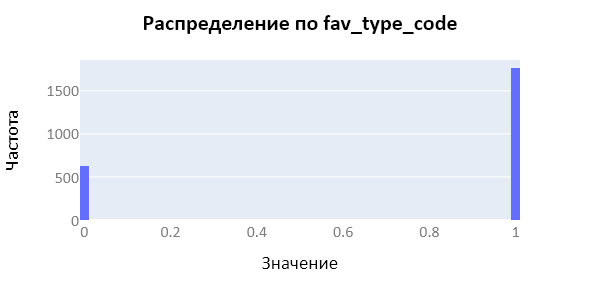

In [44]:
for column in users.columns[(users.columns !='fav_type')&(users.columns !='customer_id')]:
#     if len(data[column].value_counts()) >2:
        fig =draw_chart(users, kind='hist', data_y=column, height=300, width=600)
        fig.show('png')

In [45]:
users = users[(users.orders_cnt < users.orders_cnt.quantile(.95))&(users.sku_avg < users.sku_avg.quantile(.95))\
     &(users.items_avg < users.items_avg.quantile(.95))&(users.sum_avg < users.sum_avg.quantile(.95))].copy()

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
Обнаружены и убраны выбросы по полям <b>orders_cnt</b>, <b>sku_avg</b>, <b>items_avg</b>, <b>sum_avg</b> (выход за 95-й квантиль).
</div>

## Кластеризация покупателей

### Выбор оптимального числа кластеров

In [46]:
X = users.drop(['customer_id', 'fav_type'], axis=1)

In [47]:
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [48]:
linked = linkage(X_st, method = 'ward')

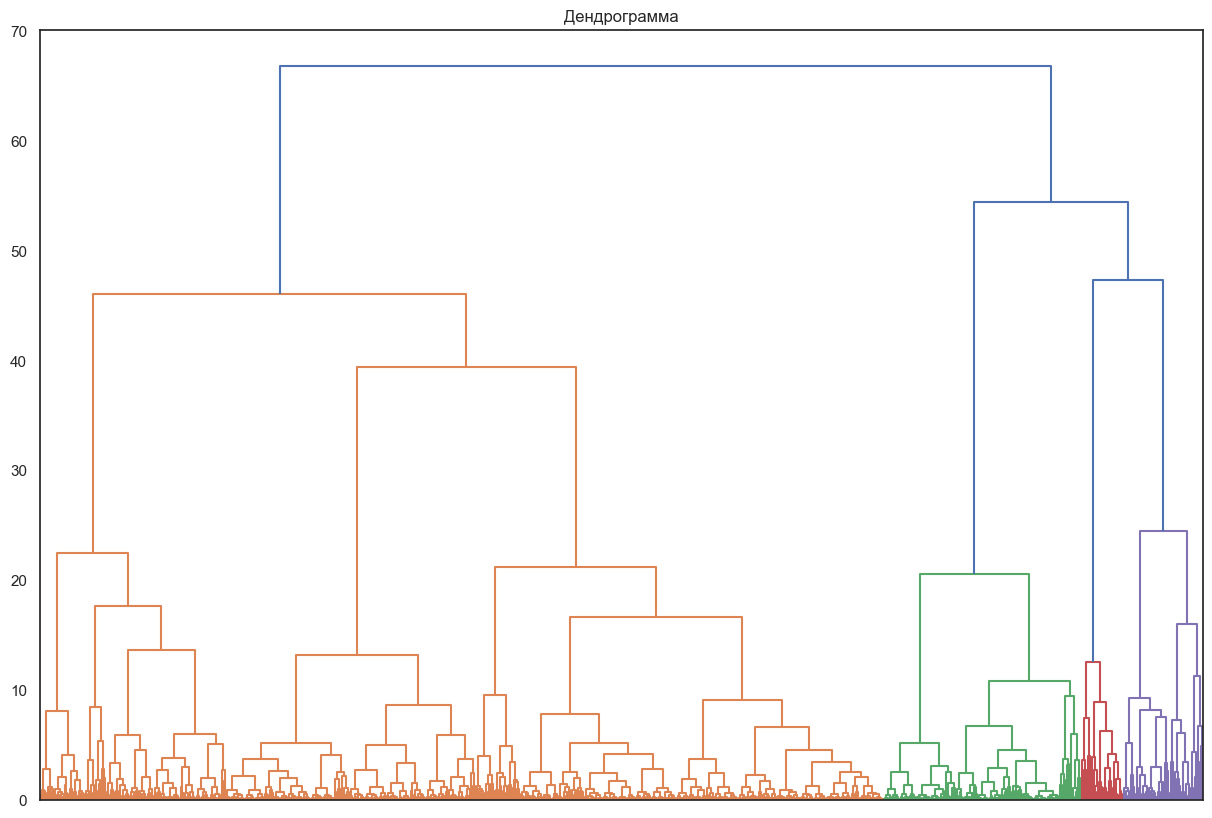

In [49]:
draw_chart(data=linked, kind='dendrogram', title='Дендрограмма')

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
Оптимальное число кластеров — 4 (по числу цветов на дендрограмме).
</div>

### Кластеризация

In [50]:
km = KMeans(n_clusters = 4, random_state=0)

In [51]:
labels = km.fit_predict(X_st)

In [52]:
users['cluster_km'] = labels

In [53]:
users.groupby('cluster_km', as_index=False).mean()

,cluster_km,orders_cnt,sku_avg,items_avg,sum_avg,lifetime_mo,mean_order_gap_mo,fav_type_code
0,0,1.0,1.022545,1.307636,994.234182,6.778960,-1.0,0.999273
1,1,1.0,3.757282,4.553398,788.815534,8.274078,-1.0,0.223301
2,2,1.0,1.086351,1.481894,331.169916,5.894624,-1.0,0.000000
3,3,1.0,1.079646,10.026549,997.247788,7.439027,-1.0,0.876106


In [54]:
users.groupby('cluster_km').agg(users_cnt=('customer_id','count')).reset_index()

,cluster_km,users_cnt
0,0,1375
1,1,103
2,2,359
3,3,113


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
Алгоритм к-средних разделил пользователей на 4 кластера.<br> 
Больше половины оказались в одном (кластер 0), остальные попали в 3 других.

<i>Характеристики кластеров</i>
<li>кластер 0 — типичный клиент: 1 покупка, 1 SKU, 1 товар (из хозтоваров), высокий чек</li>
<li>кластер 1 — редкий клиент: 1 покупка, несколько SKU, несколько товаров (как правило, из растений), средний чек</li>
<li>кластер 2 — нетипичный клиент: 1 покупка, 1 SKU, 1 товар (из растений), низкий чек</li>
<li>кластер 3 — редкий клиент: 1 покупка, 1 SKU, несколько товаров (как правило, из хозтоваров), высокий чек</li>
</div>

### Проверка стат.значимости кластеризации

In [55]:
alpha = 1-(1-0.05)**(1/6)

In [56]:
users = users.fillna(0)

In [57]:
for i in (range(0,4)):
    for j in (range(i+1,4)):
            data_1 = users[users['cluster_km']==i]['items_avg'].to_list()
            data_2 = users[users['cluster_km']==j]['items_avg'].to_list()    
            results = st.mannwhitneyu(data_1, data_2)
            p_value = results.pvalue
            if p_value < alpha:
                print('Пара {}-{} — p-value = {} — между кластерами есть значимая разница'.format(i, j, p_value))
            else:
                print('Пара {}-{} — p-value = {} — нет оснований считать кластеры разными'.format(i, j, p_value)) 

Пара 0-1 — p-value = 2.2515732972647116e-102 — между кластерами есть значимая разница
Пара 0-2 — p-value = 2.2550192404240858e-05 — между кластерами есть значимая разница
Пара 0-3 — p-value = 7.538889139087411e-124 — между кластерами есть значимая разница
Пара 1-2 — p-value = 2.1897588892434045e-54 — между кластерами есть значимая разница
Пара 1-3 — p-value = 9.952537475386599e-31 — между кластерами есть значимая разница
Пара 2-3 — p-value = 4.1497422620391224e-69 — между кластерами есть значимая разница


In [58]:
for i in (range(0,4)):
    for j in (range(i+1,4)):
        if i != j:
            data_1 = users[users['cluster_km']==i]['fav_type_code'].to_list()
            data_2 = users[users['cluster_km']==j]['fav_type_code'].to_list()    
            results = st.mannwhitneyu(data_1, data_2)
            p_value = results.pvalue
            if p_value < alpha:
                print('Пара {}-{} — p-value = {} — между кластерами есть значимая разница'.format(i, j, p_value))
            else:
                print('Пара {}-{} — p-value = {} — нет оснований считать кластеры разными'.format(i, j, p_value)) 

Пара 0-1 — p-value = 4.763923203815581e-244 — между кластерами есть значимая разница
Пара 0-2 — p-value = 0.0 — между кластерами есть значимая разница
Пара 0-3 — p-value = 2.2737866834788374e-36 — между кластерами есть значимая разница
Пара 1-2 — p-value = 4.5583899254614066e-20 — между кластерами есть значимая разница
Пара 1-3 — p-value = 5.32280102854571e-22 — между кластерами есть значимая разница
Пара 2-3 — p-value = 2.314626474052908e-88 — между кластерами есть значимая разница


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b>Вывод</b><br>
<li>кластеризация статистически значима: нашлись 2 признака, для которых это подтвердил критерий Манна-Уитни </li>
<li>алгоритм в основном руководствовался средним количеством товаров в заказе и любимой категорией пользователя</li>
</div>

## Рекомендации

* всем клиентам напомнить о себе — они не возвращаются, приходят на 1 раз
* клиентам из кластеров 1 и 2 — с февраля по май предлагать скидки на товары из растений
  - при этом клиентам из кластера 2 — акции вида "купи N штук и получи ещё 1 в подарок", т.к. в основном покупают по 1 вещи
* клиентам из кластеров 0 и 3 — предлагать скидки на хозтовары осенью и в феврале 
  - при этом клиентам из кластера 0 — акции вида "купи N штук и получи ещё 1 в подарок", т.к. в основном покупают по 1 вещи
  - а клиентам из кластера 3 — ещё и скидки на товары из растений

___